In [ ]:
# Copyright 2023, Acadential, All rights reserved.

# 14-7. PyTorch로 구현해보는 CNN layer 및 모델


In [1]:
import os 
import numpy as np 
import torch 
from torch import nn 
import torchvision

<div>
<center>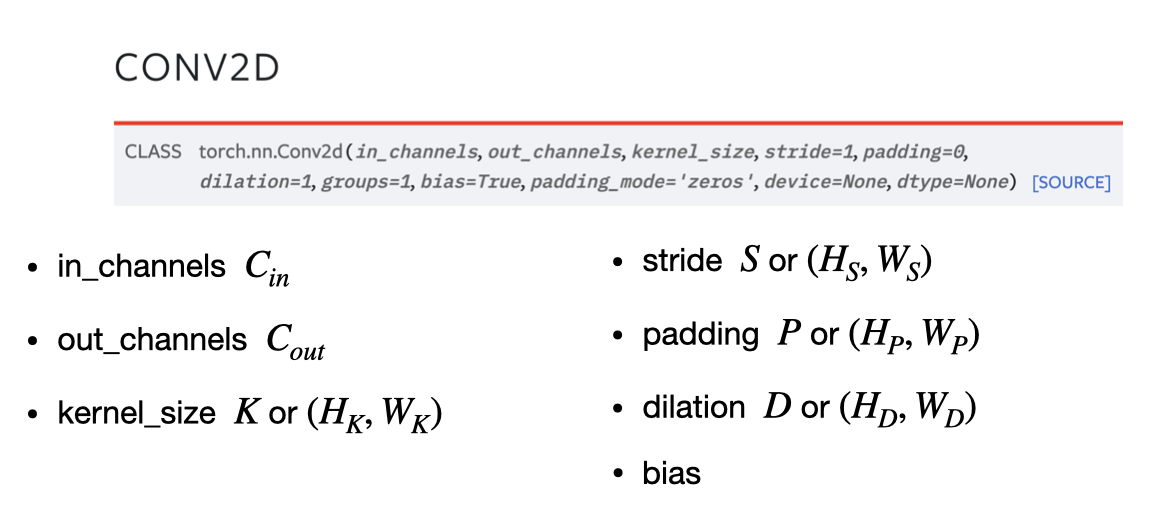</center>
<div>
    
<!-- 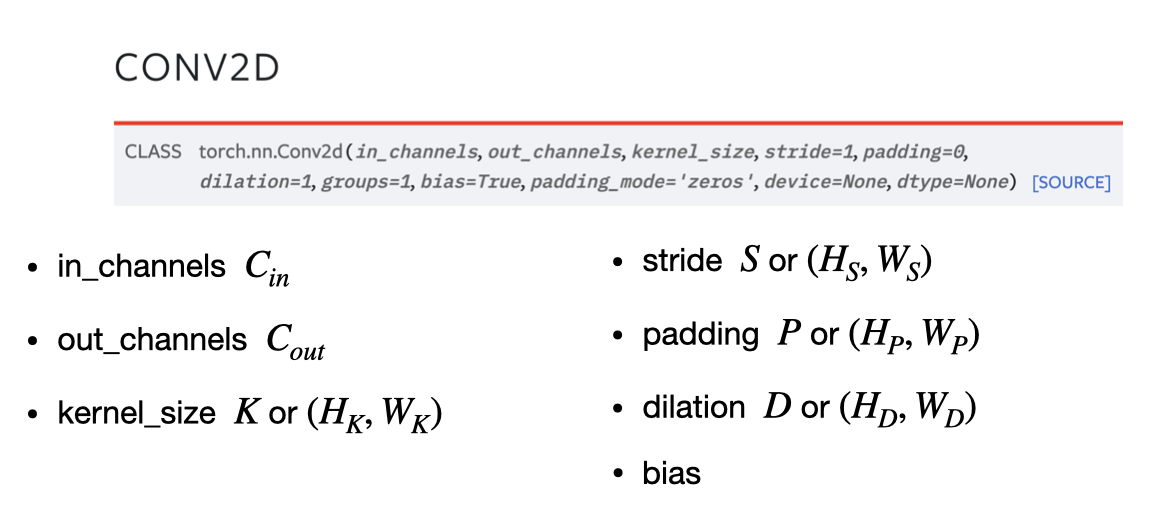 -->

# Introduction to Conv2d

## 예시 1 (Kernel size=3, padding=0)

In [2]:
# Initialize random tensor
batch_size = 8
in_channels = 3
out_channels = 16
kernel_size = 3
width, height = 64, 64
padding=0  # default value
stride=1  # default value
dilation=1  # default value

In [3]:
x = torch.rand(batch_size, in_channels, height, width)  # 4D tensor

batch_size에 대한 dimension이 포함되기 때문에 2D Convolutional layer은 4D tensor을 입력값으로 받게됩니다

In [4]:
x.shape

torch.Size([8, 3, 64, 64])

In [5]:
# Initialize Conv2d Layer

conv_layer = nn.Conv2d(
    in_channels=in_channels,
    out_channels=out_channels,
    kernel_size=kernel_size,
    stride=stride,
    padding=padding,
    dilation=dilation
)

In [6]:
# Forward pass

y = conv_layer(x)

In [7]:
y.shape

torch.Size([8, 16, 62, 62])

padding은 0이고 kernel_size=3이라서 output Height, Width가 64 -> 62로 줄어든 것을 확인할 수 있습니다.

## 예시 2 (Kernel size=3, padding=1)

In [8]:
# Initialize Conv2d Layer
kernel_size=3## 예시 1 (Kernel size=3, padding=0)
padding=1

conv_layer = nn.Conv2d(
    in_channels=in_channels,
    out_channels=out_channels,
    kernel_size=kernel_size,
    stride=stride,
    padding=padding,
    dilation=dilation
)

In [9]:
# Forward pass

y = conv_layer(x)

In [10]:
y.shape

torch.Size([8, 16, 64, 64])

padding은 1이고 kernel_size=3이라서 output Height, Width가 그대로 64 인 것을 확인할 수 있습니다.

## Changing Kernel size

In [11]:
in_channels = 3
out_channels = 16
width, height = 64, 64
padding=0  # default value
stride=1  # default value
dilation=1  # default value

In [12]:
for kernel_size in [1, 3, 5, 7, 16]:
    conv_layer = nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=kernel_size,
        stride=stride,
        padding=padding,
        dilation=dilation
    )
    y = conv_layer(x)
    print(f"-------------  Kernel size = {kernel_size}  -------------")
    print(f"Output shape == {y.shape}\n")

-------------  Kernel size = 1  -------------
Output shape == torch.Size([8, 16, 64, 64])

-------------  Kernel size = 3  -------------
Output shape == torch.Size([8, 16, 62, 62])

-------------  Kernel size = 5  -------------
Output shape == torch.Size([8, 16, 60, 60])

-------------  Kernel size = 7  -------------
Output shape == torch.Size([8, 16, 58, 58])

-------------  Kernel size = 16  -------------
Output shape == torch.Size([8, 16, 49, 49])



Kernel size을 늘리면 Output height, width은 줄어듭니다!

## Changing Padding

In [13]:
in_channels = 3
out_channels = 16
kernel_size=3
stride=1  # default value
dilation=1  # default value

In [14]:
for padding in [1, 3, 5, 7, 16]:
    conv_layer = nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=kernel_size,
        stride=stride,
        padding=padding,
        dilation=dilation
    )
    y = conv_layer(x)
    print(f"-------------  Padding = {padding}  -------------")
    print(f"Output shape == {y.shape}\n")

-------------  Padding = 1  -------------
Output shape == torch.Size([8, 16, 64, 64])

-------------  Padding = 3  -------------
Output shape == torch.Size([8, 16, 68, 68])

-------------  Padding = 5  -------------
Output shape == torch.Size([8, 16, 72, 72])

-------------  Padding = 7  -------------
Output shape == torch.Size([8, 16, 76, 76])

-------------  Padding = 16  -------------
Output shape == torch.Size([8, 16, 94, 94])



Padding을 늘리면 Output height, width도 늘어납니다!

## Changing Dilation

In [15]:
# Initialize random tensor
in_channels = 3
out_channels = 16
kernel_size=3
padding=0
stride=1  # default value

In [16]:
for dilation in [1, 2, 4, 8, 16]:
    conv_layer = nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=kernel_size,
        stride=stride,
        padding=padding,
        dilation=dilation
    )
    y = conv_layer(x)
    print(f"-------------  Dilation = {dilation}  -------------")
    print(f"Output shape == {y.shape}\n")

-------------  Dilation = 1  -------------
Output shape == torch.Size([8, 16, 62, 62])

-------------  Dilation = 2  -------------
Output shape == torch.Size([8, 16, 60, 60])

-------------  Dilation = 4  -------------
Output shape == torch.Size([8, 16, 56, 56])

-------------  Dilation = 8  -------------
Output shape == torch.Size([8, 16, 48, 48])

-------------  Dilation = 16  -------------
Output shape == torch.Size([8, 16, 32, 32])



Dilation을 늘리면 Output height, width은 줄어듭니다!

## Changing Stride

In [17]:
# Initialize random tensor
in_channels = 3
out_channels = 16
kernel_size=3
padding=0

In [18]:
for stride in [1, 2, 4, 8, 16]:
    conv_layer = nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=kernel_size,
        stride=stride,
        padding=padding,
        dilation=dilation
    )
    y = conv_layer(x)
    print(f"-------------  Stride = {stride}  -------------")
    print(f"Output shape == {y.shape}\n")

-------------  Dilation = 16  -------------
Output shape == torch.Size([8, 16, 32, 32])

-------------  Dilation = 16  -------------
Output shape == torch.Size([8, 16, 16, 16])

-------------  Dilation = 16  -------------
Output shape == torch.Size([8, 16, 8, 8])

-------------  Dilation = 16  -------------
Output shape == torch.Size([8, 16, 4, 4])

-------------  Dilation = 16  -------------
Output shape == torch.Size([8, 16, 2, 2])



Stride을 늘리면 Output height, width은 줄어든다!

# Basic CNN block (Conv2d + BatchNorm2d + ReLU)

CNN 모델들의 특징:

- 일반적으로 CNN block의 기본 구성은 Conv2d + BatchNorm + ReLU입니다. 
- CNN block이 여러개 쌓여있고 마지막에 Pooling layer을 포함합니다.
- 일반적으로 각 CNN block내에서는 Input의 height와 width와 동일한 output height와 width을 가집니다.
    - 즉, CNN block에서는 height와 width가 일정하게 유지되고,
    - Pooling 단계에서 비로소 Height와 Width을 줄여줍니다.
    - CNN block에서 height와 width을 일정하게 유지해주기 위해서 Kernel size에 적절한 Padding 크기를 지정해줍니다. (예를 들어, kernel_size=3, padding=1)

In [20]:
# Basic Convolutional Block
# Conv2d + BatchNorm2d + ReLU

conv_block_list = [
    nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=3,
        padding=1,
    ),
    nn.BatchNorm2d(num_features=out_channels),
    nn.ReLU()
]
conv_block = nn.Sequential(*conv_block_list)

In [21]:
x = torch.rand(batch_size, in_channels, height, width)  # 4D tensor

In [22]:
y = conv_block(x)

In [23]:
y.shape

torch.Size([8, 16, 64, 64])

Kernel size==3, Padding==1을 사용하여 Convolutional Block에서는 height, width가 유지되었습니다!

# CNN Layer (ConvBlock * N + Pooling)

In [25]:
n_blocks = 3
conv_layer_list = []
in_channels = 3

for i in range(n_blocks):
    conv_block_list = [
        nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            padding=1,
        ),
        nn.BatchNorm2d(num_features=out_channels),
        nn.ReLU()
    ]
    in_channels=out_channels
    conv_block = nn.Sequential(*conv_block_list)
    conv_layer_list.append(conv_block)

conv_layer_list.append(
    nn.MaxPool2d(kernel_size=2, stride=2)
)
conv_layer = nn.Sequential(*conv_layer_list)

In [26]:
y = conv_layer(x)

In [27]:
y.shape 

torch.Size([8, 16, 32, 32])

Convolutional Block에서는 height, width가 유지된다. 마지막 Pooling layer을 통과하면서 heigth, width가 각각 1/2씩 줄어들었습니다!